In [43]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib.dates as mdates

from datetime import date

In [44]:
df = pd.read_csv('data/data.csv')

# Daily active cases
df['dailyActive'] = df['dailyconfirmed'] - (df['dailyrecovered'] + df['dailydeceased'])

# Total active cases
df['totalActive'] = df['totalconfirmed'] - (df['totalrecovered'] + df['totaldeceased'])

# Calculate 5 days moving average
df['sma_5'] = df.iloc[:,0].rolling(window=5).mean()
df['sma_14'] = df.iloc[:,0].rolling(window=14).mean()
df['sma_21'] = df.iloc[:,0].rolling(window=21).mean()

# df['date'] = pd.to_datetime(df['date'])

# Filter from lockdown 1.0 , i.e. 25 March
mask = (df['date'] >= '2020-03-25') # & (df['date'] < '2020-05-17')
df = df.loc[mask]
df.tail()

,dailyconfirmed,dailydeceased,dailyrecovered,date,totalconfirmed,totaldeceased,totalrecovered,dailyActive,totalActive,sma_5,sma_14,sma_21
199,58096,952,57404,2020-08-16,2647318,51048,1918069,-260,678201,63779.8,60175.785714,57680.857143
200,54298,880,58172,2020-08-17,2701616,51928,1976241,-4754,673447,61226.2,60447.928571,58052.952381
201,65024,1099,60455,2020-08-18,2766640,53027,2036696,3470,676917,61402.8,61429.500000,58785.952381
202,69196,979,59365,2020-08-19,2835836,54006,2096061,8852,685769,62120.0,62327.357143,59582.000000
203,68518,981,61873,2020-08-20,2904354,54987,2157934,5664,691433,63026.4,62780.785714,60227.238095


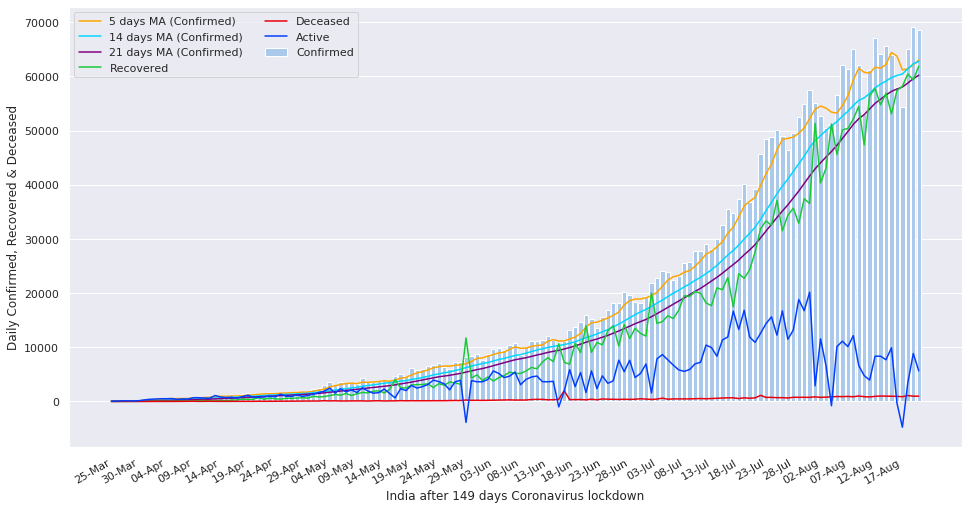

In [45]:
################################
# Daily plot

# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set(style="darkgrid")

sns.set_color_codes("pastel")
sns.barplot(x=df.date, y=df.dailyconfirmed, color='b', label='Confirmed')

# Plot moving averages
sns.lineplot(x=df.date, y=df.sma_5, color='orange', label='5 days MA (Confirmed)')
sns.lineplot(x=df.date, y=df.sma_14, color='c', label='14 days MA (Confirmed)')
sns.lineplot(x=df.date, y=df.sma_21, color='purple', label='21 days MA (Confirmed)')

sns.set_color_codes("bright")
sns.lineplot(x=df.date, y=df.dailyrecovered, color='g', label='Recovered')
sns.lineplot(x=df.date, y=df.dailydeceased, color='r', label='Deceased')

sns.lineplot(x=df.date, y=df.dailyActive, color='b', label='Active')

# handles,labels = axs.get_legend_handles_labels()
# handles = [handles[0], handles[1], handles[2], handles[3]]
# labels = [labels[0], labels[1], labels[2], labels[3]]

# set the frequency for labelling the xaxis
freq = int(5)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df.iloc[::freq].date
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

# nicer label format for dates
fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=2, frameon=True, loc='upper left')
axs.set(ylabel="Daily Confirmed, Recovered & Deceased", xlabel= "India after " + str(len(df.index)) + " days Coronavirus lockdown")

plt.show()
fig.savefig('asset/daily.png')

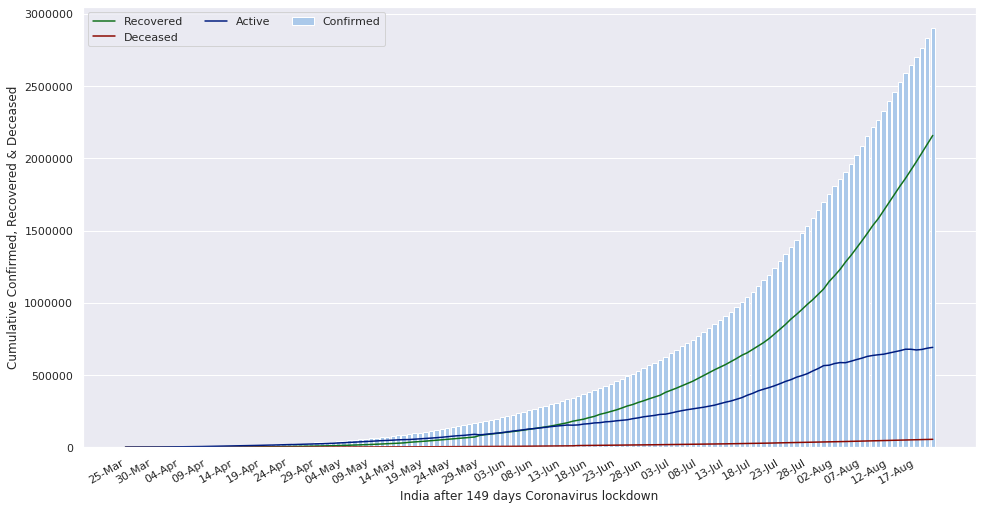

In [46]:
###############################
# Cumulative plot

# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set_color_codes("pastel")
sns.barplot(x=df.date, y=df.totalconfirmed, color='b', label='Confirmed')
sns.set_color_codes("dark")
sns.lineplot(x=df.date, y=df.totalrecovered, color='g', label='Recovered')
sns.lineplot(x=df.date, y=df.totaldeceased, color='r', label='Deceased')

sns.lineplot(x=df.date, y=df.totalActive, color='b', label='Active')

# set the frequency for labelling the xaxis
freq = int(5)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df.iloc[::freq].date
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=3, frameon=True)
axs.set(ylabel="Cumulative Confirmed, Recovered & Deceased", xlabel= "India after " + str(len(df.index)) + " days Coronavirus lockdown")

plt.show()
fig.savefig('asset/total.png')

In [47]:
###############################3
# Testing plot

# load data
df_tested = pd.read_csv('data/tested.csv')
df_tested['updatetimestamp'] = pd.to_datetime(df_tested['updatetimestamp'], dayfirst=True) #.format('%Y-%m-%d')
df_tested['daily_tested'] = df_tested['totalsamplestested'] - df_tested['totalsamplestested'].shift()

df_tested.tail(5)


,individualstestedperconfirmedcase,positivecasesfromsamplesreported,samplereportedtoday,source,source1,testedasof,testpositivityrate,testsconductedbyprivatelabs,testsperconfirmedcase,testspermillion,totalindividualstested,totalpositivecases,totalsamplestested,updatetimestamp,daily_tested
159,NaN,NaN,731697,http://twitter.com/ICMRDELHI/status/1295198089...,https://t.me/Covid19india_Auxiliary_Test_Data/...,16/08/2020,NaN,NaN,NaN,22538.0,NaN,NaN,30041400.0,2020-08-17 09:00:00,731697.0
160,NaN,NaN,899864,https://twitter.com/ICMRDELHI/status/129556177...,https://t.me/Covid19india_Auxiliary_Test_Data/...,17/08/2020,NaN,NaN,NaN,23213.0,NaN,NaN,30941264.0,2020-08-18 09:00:00,899864.0
161,NaN,NaN,801518,http://twitter.com/ICMRDELHI/status/1295929066...,https://t.me/Covid19india_Auxiliary_Test_Data/...,18/08/2020,NaN,NaN,NaN,23815.0,NaN,NaN,31742782.0,2020-08-19 09:00:00,801518.0
162,NaN,NaN,918470,https://twitter.com/ICMRDELHI/status/129629641...,https://t.me/Covid19india_Auxiliary_Test_Data/...,19/08/2020,NaN,NaN,NaN,24504.0,NaN,NaN,32661252.0,2020-08-20 09:00:00,918470.0
163,NaN,NaN,805985,http://twitter.com/ICMRDELHI/status/1296650359...,https://t.me/Covid19india_Auxiliary_Test_Data/...,20/08/2020,NaN,NaN,NaN,25109.0,NaN,NaN,33467237.0,2020-08-21 09:00:00,805985.0


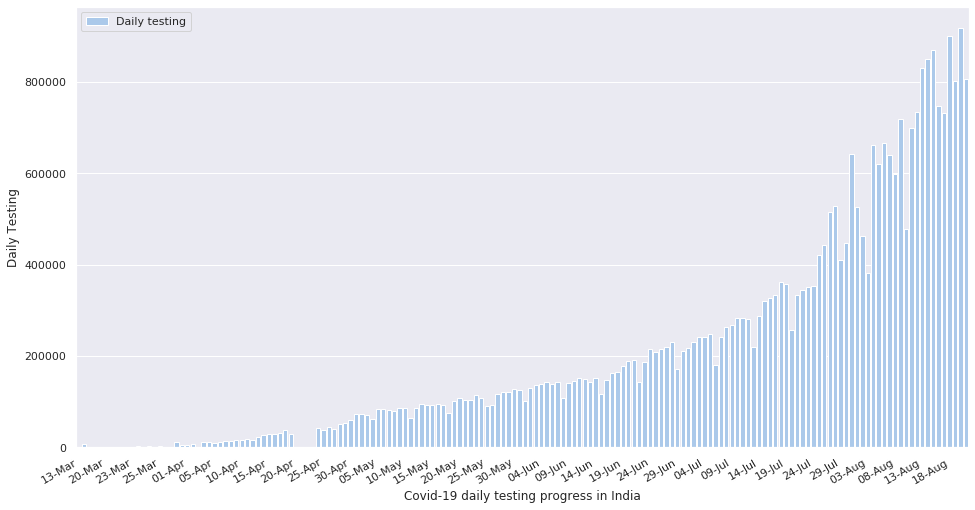

In [48]:

# Initialize the matplotlib figure
fig, axs = plt.subplots(figsize=(16, 9))

sns.set_color_codes("pastel")

# Plot testing data
sns.barplot(x=df_tested.updatetimestamp, y=df_tested.daily_tested, color='b', label='Daily testing')

# set the frequency for labelling the xaxis
freq = int(5)

# set the xlabels as the datetime data for the given labelling frequency,
# also use only the date for the label

dt = df_tested.iloc[::freq].updatetimestamp
dt = pd.to_datetime(dt).dt.strftime('%d-%b')
axs.set_xticklabels(dt)

# set the xticks at the same frequency as the xlabels
xtix = axs.get_xticks()
axs.set_xticks(xtix[::freq])

fig.autofmt_xdate()

# Add a legend and informative axis label
axs.legend(ncol=1, frameon=True, loc='upper left')
axs.set(ylabel="Daily Testing", xlabel= "Covid-19 daily testing progress in India")

plt.show()
fig.savefig('asset/testing.png')